In [4]:
import nibabel as nib
import numpy as np
from pathlib import Path

# ---- THAY CASE TẠI ĐÂY ----
case_id = "Brain_001"   # Ví dụ
root = Path("../data/processed/3d/labeled") / case_id

modalities = ["flair", "t1", "t1ce", "t2"]

print(f"=== Checking intensity of {case_id} ===")
for mod in modalities:
    fp = root / f"{mod}.nii.gz"
    img = nib.load(str(fp)).get_fdata().astype(np.float32)

    print(f"\n--- {mod.upper()} ---")
    print(f" shape = {img.shape}")
    print(f" min   = {img.min():.6f}")
    print(f" max   = {img.max():.6f}")
    print(f" mean  = {img.mean():.6f}")
    print(f" std   = {img.std():.6f}")

    # kiểm tra xem có ra ngoài [0,1] không
    out_of_range = np.logical_or(img < 0, img > 1).sum()
    print(f" out-of-range voxels (<0 or >1): {out_of_range}")

# ---- kiểm tra mask ---
mask_fp = root / "mask.nii.gz"
mask = nib.load(str(mask_fp)).get_fdata().astype(np.int32)

print("\n=== MASK ===")
print(f" shape = {mask.shape}")
print(f" values = {np.unique(mask)}")


=== Checking intensity of Brain_001 ===

--- FLAIR ---
 shape = (194, 194, 155)
 min   = -2.451262
 max   = 5.000000
 mean  = -0.000021
 std   = 0.479781
 out-of-range voxels (<0 or >1): 5505760

--- T1 ---
 shape = (194, 194, 155)
 min   = -3.911204
 max   = 3.845334
 mean  = 0.000021
 std   = 0.479791
 out-of-range voxels (<0 or >1): 891142

--- T1CE ---
 shape = (194, 194, 155)
 min   = -3.373194
 max   = 5.000000
 mean  = -0.001053
 std   = 0.465840
 out-of-range voxels (<0 or >1): 5296804

--- T2 ---
 shape = (194, 194, 155)
 min   = -2.300097
 max   = 5.000000
 mean  = 0.000033
 std   = 0.479786
 out-of-range voxels (<0 or >1): 1049514

=== MASK ===
 shape = (194, 194, 155)
 values = [0 1 2 3]


In [2]:
with open(r"D:\Project Advanced CV\configs\splits_task01\test.txt", "w") as f:
    for i in range(1, 101):
        f.write(f"Brain_{i:03d}\n")

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Tên các mô hình (thử nghiệm)
methods = [
    "VNet full volume",
    "VNet patch (DiceCE)",
    "VNet patch (Dice)",
    "VNet Multi-head",
    "VNet Multi-encoder",
]

# --------- WT ----------
wt_dice  = [0.8501, 0.8977, 0.9024, 0.8944, 0.9011]
wt_iou   = [0.7706, 0.8236, 0.8236, 0.8195, 0.8300]

# --------- TC ----------
tc_dice  = [0.7949, 0.8353, 0.8633, 0.8315, 0.8499]
tc_iou   = [0.7068, 0.7464, 0.7664, 0.7416, 0.7706]

# --------- ET ----------
et_dice  = [0.7265, 0.7519, 0.7617, 0.7680, 0.7498]
et_iou   = [0.6219, 0.6556, 0.6650, 0.6703, 0.6599]

# --------- ASD ----------
wt_asd = [1.5178, 3.1626, 2.0219, 2.4352, 2.8607]
tc_asd = [2.2944, 3.5748, 1.6688, 2.7558, 2.8147]
et_asd = [1.7098, 3.4380, 1.6565, 1.5727, 2.8145]

# --------- HD95 ----------
wt_hd95 = [5.8878,10.1072, 6.9727, 7.7570, 8.6980]
tc_hd95 = [7.5172, 9.3785, 5.5709, 8.2220, 6.6950]
et_hd95 = [5.1759, 7.8940, 5.3642, 5.2660, 6.5197]


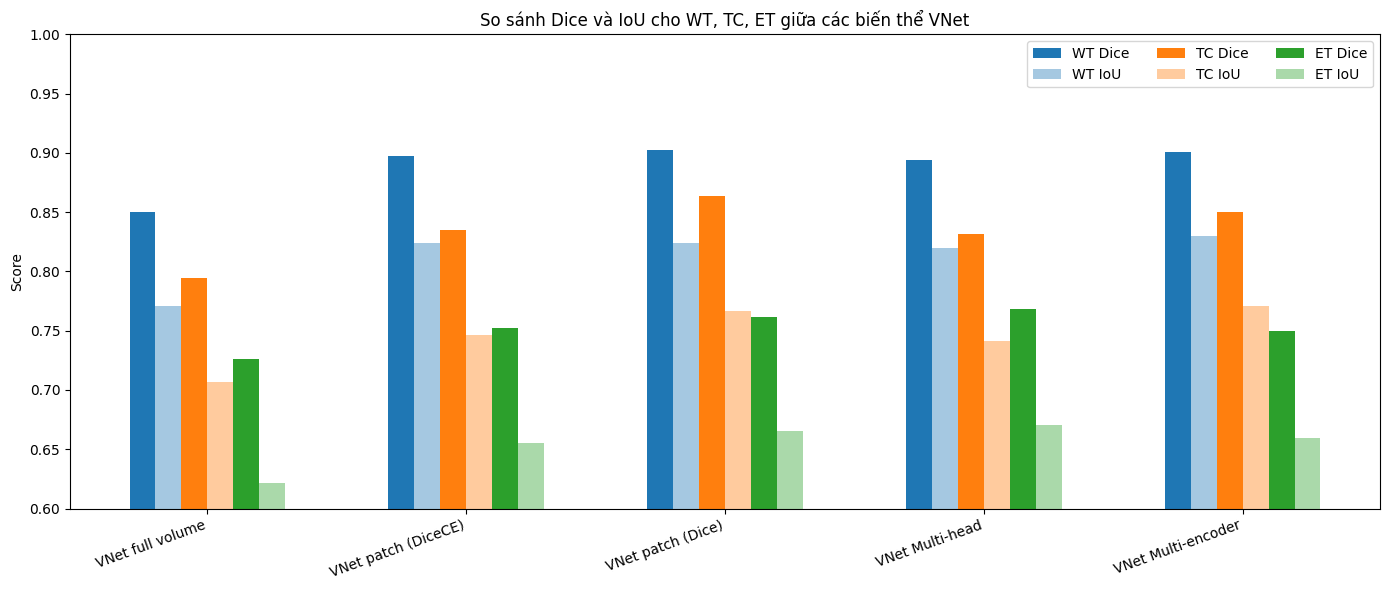

In [7]:
x = np.arange(len(methods))  # số mô hình
width = 0.1                  # độ rộng mỗi cột

plt.figure(figsize=(14, 6))

# offset của 6 cột trong 1 nhóm
offsets = np.array([-2.5, -1.5, -0.5, 0.5, 1.5, 2.5]) * width

# Màu cho 3 vùng (Dice đậm, IoU nhạt hơn)
colors_dice = ['tab:blue', 'tab:orange', 'tab:green']
colors_iou  = ['tab:blue', 'tab:orange', 'tab:green']  # dùng alpha để nhạt hơn

# WT
plt.bar(x + offsets[0], wt_dice, width, label='WT Dice', color=colors_dice[0])
plt.bar(x + offsets[1], wt_iou,  width, label='WT IoU',
        color=colors_iou[0], alpha=0.4)

# TC
plt.bar(x + offsets[2], tc_dice, width, label='TC Dice', color=colors_dice[1])
plt.bar(x + offsets[3], tc_iou,  width, label='TC IoU',
        color=colors_iou[1], alpha=0.4)

# ET
plt.bar(x + offsets[4], et_dice, width, label='ET Dice', color=colors_dice[2])
plt.bar(x + offsets[5], et_iou,  width, label='ET IoU',
        color=colors_iou[2], alpha=0.4)

plt.xticks(x, methods, rotation=20, ha='right')
plt.ylabel('Score')
plt.ylim(0.6, 1.0)
plt.title('So sánh Dice và IoU cho WT, TC, ET giữa các biến thể VNet')
plt.legend(ncol=3)
plt.tight_layout()
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Tên các thử nghiệm
methods = [
    "VNet full volume",
    "VNet patch (DiceCE)",
    "VNet patch (Dice)",
    "VNet Multi-head",
    "VNet Multi-encoder",
]

# Số liệu cho WT / TC / ET
# Mỗi mục: metrics[phương pháp][vùng][chỉ số]
metrics = {
    "VNet full volume": {
        "WT": {"Dice": 0.8501, "IoU": 0.7706, "ASD": 1.5178, "HD95": 5.8878},
        "TC": {"Dice": 0.7949, "IoU": 0.7068, "ASD": 2.2944, "HD95": 7.5172},
        "ET": {"Dice": 0.7265, "IoU": 0.6219, "ASD": 1.7098, "HD95": 5.1759},
    },
    "VNet patch (DiceCE)": {
        "WT": {"Dice": 0.8977, "IoU": 0.8236, "ASD": 3.1626, "HD95": 10.1072},
        "TC": {"Dice": 0.8353, "IoU": 0.7464, "ASD": 3.5748, "HD95": 9.3785},
        "ET": {"Dice": 0.7519, "IoU": 0.6556, "ASD": 3.4380, "HD95": 7.8940},
    },
    "VNet patch (Dice)": {
        "WT": {"Dice": 0.9024, "IoU": 0.8236, "ASD": 2.0219, "HD95": 6.9727},
        "TC": {"Dice": 0.8633, "IoU": 0.7664, "ASD": 1.6688, "HD95": 5.5709},
        "ET": {"Dice": 0.7617, "IoU": 0.6650, "ASD": 1.6565, "HD95": 5.3642},
    },
    "VNet Multi-head": {
        "WT": {"Dice": 0.8944, "IoU": 0.8195, "ASD": 2.4352, "HD95": 7.7570},
        "TC": {"Dice": 0.8315, "IoU": 0.7416, "ASD": 2.7558, "HD95": 8.2220},
        "ET": {"Dice": 0.7680, "IoU": 0.6703, "ASD": 1.5727, "HD95": 5.2660},
    },
    "VNet Multi-encoder": {
        "WT": {"Dice": 0.9011, "IoU": 0.8300, "ASD": 2.8607, "HD95": 8.6980},
        "TC": {"Dice": 0.8499, "IoU": 0.7706, "ASD": 2.8147, "HD95": 6.6950},
        "ET": {"Dice": 0.7498, "IoU": 0.6599, "ASD": 2.8145, "HD95": 6.5197},
    },
}


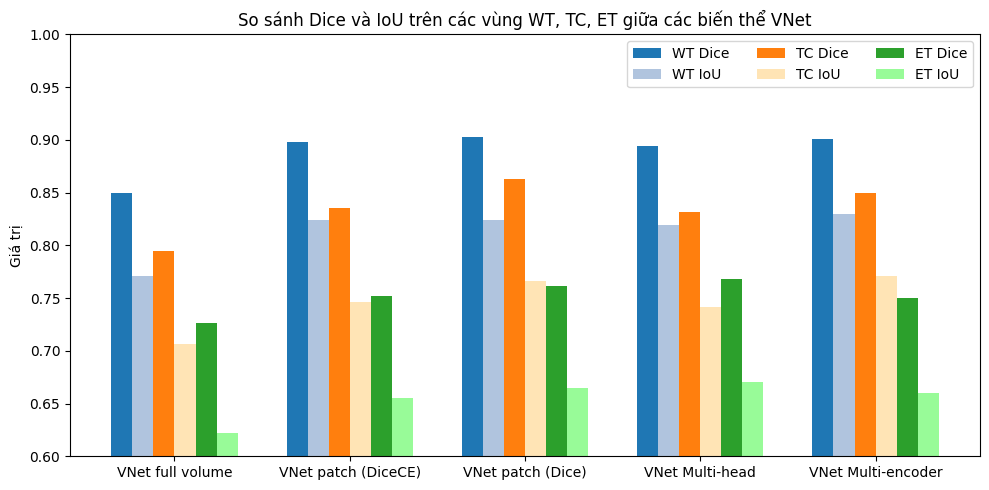

In [11]:
regions = ["WT", "TC", "ET"]
stats_pair = ("Dice", "IoU")

x = np.arange(len(methods))
width = 0.12  # độ rộng mỗi cột

# màu cho Dice (đậm) và IoU (nhạt hơn) theo từng vùng
colors_dice = ["tab:blue", "tab:orange", "tab:green"]
colors_iou  = ["lightsteelblue", "moccasin", "palegreen"]

fig, ax = plt.subplots(figsize=(10, 5))

for ridx, region in enumerate(regions):
    for sidx, stat in enumerate(stats_pair):
        bar_index = ridx * 2 + sidx          # 0..5
        offset = (bar_index - 2.5) * width   # để 6 cột dàn đều quanh tâm

        vals = [metrics[m][region][stat] for m in methods]

        if stat == "Dice":
            color = colors_dice[ridx]
        else:
            color = colors_iou[ridx]

        label = f"{region} {stat}"
        ax.bar(x + offset, vals, width, label=label, color=color)

ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=0,)
ax.set_ylabel("Giá trị")
ax.set_ylim(0.6, 1.0)
ax.set_title("So sánh Dice và IoU trên các vùng WT, TC, ET giữa các biến thể VNet")
ax.legend(ncol=3)
plt.tight_layout()
plt.show()


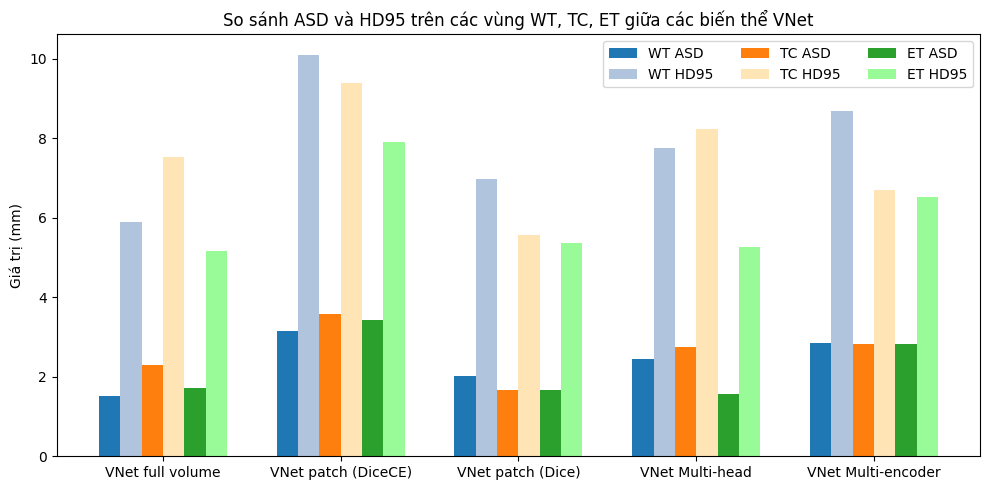

In [13]:
stats_pair2 = ("ASD", "HD95")

x = np.arange(len(methods))
width = 0.12

fig, ax = plt.subplots(figsize=(10, 5))

# màu cho ASD / HD95 (có thể tái sử dụng bảng màu ở trên)
colors_asd  = ["tab:blue", "tab:orange", "tab:green"]
colors_hd95 = ["lightsteelblue", "moccasin", "palegreen"]

for ridx, region in enumerate(regions):
    for sidx, stat in enumerate(stats_pair2):
        bar_index = ridx * 2 + sidx
        offset = (bar_index - 2.5) * width

        vals = [metrics[m][region][stat] for m in methods]

        if stat == "ASD":
            color = colors_asd[ridx]
        else:
            color = colors_hd95[ridx]

        label = f"{region} {stat}"
        ax.bar(x + offset, vals, width, label=label, color=color)

ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=0)
ax.set_ylabel("Giá trị (mm)")
ax.set_title("So sánh ASD và HD95 trên các vùng WT, TC, ET giữa các biến thể VNet")
ax.legend(ncol=3)
plt.tight_layout()
plt.show()
